# Capstone project

# TMDB Movie Analysis

###### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler,normalize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,precision_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
cr=pd.read_csv("C:/Users/saran/Downloads/DS_C14_Capstone_tmdb_5000_credits.csv")   # loading the two csv files into dataframes

mv=pd.read_csv("C:/Users/saran/Downloads/DS_C14_Capstone_tmdb_5000_movies.csv")

##### Exploring the two loaded datasets

In [3]:
cr.head(3)   

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [4]:
cr.shape

(4803, 4)

In [5]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [6]:
mv.head(3)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466


In [7]:
mv.shape

(4803, 18)

In [8]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  title                

##### Merging the two dataframes on common column

In [9]:
movie_df=cr.merge(mv,left_on='movie_id',right_on='id')
movie_df.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [10]:
movie_df.rename(columns={'title_x':'title'}, inplace=True)  # renaming the duplicated title column name and dropping one
movie_df.drop(columns=['id','title_y'],inplace=True)

##### Dealing with the columns having records in JSON format

In [11]:
# converting the crew column from JSon to string and then extracting director name and creating a new colum.

movie_df['crew'] = movie_df['crew'].apply(json.loads)
movie_df['director'] = movie_df['crew'].apply(lambda x: [crew_member['name'] for crew_member in x if crew_member['job'] == 'Director'][0] if any(crew_member['job'] == 'Director' for crew_member in x) else None)
movie_df = movie_df.drop('crew', axis=1)


# converting the remainig columns in JSON format using json.loads()

json_col= ['genres','keywords','production_companies','production_countries']
for col in json_col:
    movie_df[col]=movie_df[col].apply(lambda x: [item['name'] for item in json.loads(x)])


In [12]:
# # Extracting the names of first two cast from each records and adding to  new columns
# movie_df['cast'] = movie_df['cast'].apply(json.loads)
# movie_df['cast'] = movie_df['cast'].apply(lambda x: ', '.join(x))
# movie_df['cast 1'] = movie_df['cast'].str[0]
# movie_df['cast 2'] = movie_df['cast'].str[1]


In [13]:

movie_df['cast'] = movie_df['cast'].apply(json.loads)
movie_df['cast'] = movie_df['cast'].apply(lambda x: ', '.join([item['name'] for item in x]))
movie_df['cast 1'] = movie_df['cast'].str.split(', ').str[0]
movie_df['cast 2'] = movie_df['cast'].str.split(', ').str[1]

In [14]:
movie_df['genres'] = movie_df['genres'].apply(json.loads)
movie_df['genres'] = movie_df['genres'].apply(lambda x: ', '.join([item['name'] for item in x]))

movie_df['main genre'] = movie_df['genres'].str.split(', ').str[0]
movie_df['sub genre'] = movie_df['genres'].str.split(', ').str[1]

In [15]:
json_col = ['keywords', 'production_companies', 'production_countries']

for col in json_col:
    movie_df[col] = movie_df[col].apply(lambda x: [item['name'] for item in json.loads(x)])
    movie_df[col] = movie_df[col].str[0]  

In [16]:

# for col in json_col:
#     movie_df[col] = movie_df[col].apply(lambda x: ', '.join(x))

In [17]:
movie_df.head()

,movie_id,title,cast,budget,genres,homepage,keywords,original_language,overview,popularity,...,runtime,status,tagline,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre
0,19995,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,culture clash,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,Released,Enter the World of Pandora.,7.2,11800,James Cameron,Sam Worthington,Zoe Saldana,Action,Adventure
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,ocean,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,Gore Verbinski,Johnny Depp,Orlando Bloom,Adventure,Fantasy
2,206647,Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,spy,en,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,Released,A Plan No One Escapes,6.3,4466,Sam Mendes,Daniel Craig,Christoph Waltz,Action,Adventure
3,49026,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman, An...",250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,dc comics,en,Following the death of District Attorney Harve...,112.312950,...,165.0,Released,The Legend Ends,7.6,9106,Christopher Nolan,Christian Bale,Michael Caine,Action,Crime
4,49529,John Carter,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,based on novel,en,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,Released,"Lost in our world, found in another.",6.1,2124,Andrew Stanton,Taylor Kitsch,Lynn Collins,Action,Adventure


In [18]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   budget                4803 non-null   int64  
 4   genres                4803 non-null   object 
 5   homepage              1712 non-null   object 
 6   keywords              4391 non-null   object 
 7   original_language     4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4452 non-null   object 
 11  production_countries  4629 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  status               

In [19]:
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']  #Adding a new column of profit
movie_df['profit'].head()

0    2550965087
1     661000000
2     635674609
3     834939099
4      24139100
Name: profit, dtype: int64

In [20]:
movie_df.isnull().sum()      #checking for null values

movie_id                   0
title                      0
cast                       0
budget                     0
genres                     0
homepage                3091
keywords                 412
original_language          0
overview                   3
popularity                 0
production_companies     351
production_countries     174
release_date               1
revenue                    0
runtime                    2
status                     0
tagline                  844
vote_average               0
vote_count                 0
director                  30
cast 1                     0
cast 2                    53
main genre                 0
sub genre                928
profit                     0
dtype: int64

In [21]:
movie_df.duplicated().sum()   # checking for duplicated values

0

In [22]:
movie_df = movie_df.dropna(subset=['release_date','director','cast 2','production_companies','production_countries'])   #dropping the null value records
movie_df['release_year'] = pd.to_datetime(movie_df['release_date']).dt.year        #Adding a new column of release year

In [23]:
movie_df = movie_df.drop(columns=['homepage','overview','tagline','cast','genres','keywords'], axis=1)   #dropping columnns with high % of missing values and unimportant columns
movie_df['runtime']=movie_df['runtime'].fillna(movie_df['runtime'].mean())
movie_df['sub genre'] = movie_df['sub genre'].fillna('none')

In [24]:
movie_df

,movie_id,title,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre,profit,release_year
0,19995,Avatar,237000000,en,150.437577,Ingenious Film Partners,United States of America,10-12-2009,2787965087,162.0,Released,7.2,11800,James Cameron,Sam Worthington,Zoe Saldana,Action,Adventure,2550965087,2009
1,285,Pirates of the Caribbean: At World's End,300000000,en,139.082615,Walt Disney Pictures,United States of America,19-05-2007,961000000,169.0,Released,6.9,4500,Gore Verbinski,Johnny Depp,Orlando Bloom,Adventure,Fantasy,661000000,2007
2,206647,Spectre,245000000,en,107.376788,Columbia Pictures,United Kingdom,26-10-2015,880674609,148.0,Released,6.3,4466,Sam Mendes,Daniel Craig,Christoph Waltz,Action,Adventure,635674609,2015
3,49026,The Dark Knight Rises,250000000,en,112.312950,Legendary Pictures,United States of America,16-07-2012,1084939099,165.0,Released,7.6,9106,Christopher Nolan,Christian Bale,Michael Caine,Action,Crime,834939099,2012
4,49529,John Carter,260000000,en,43.926995,Walt Disney Pictures,United States of America,07-03-2012,284139100,132.0,Released,6.1,2124,Andrew Stanton,Taylor Kitsch,Lynn Collins,Action,Adventure,24139100,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,124606,Bang,0,en,0.918116,Asylum Films,United States of America,09-09-1995,0,98.0,Released,6.0,1,Ash Baron-Cohen,Darling Narita,Peter Greene,Drama,none,0,1995
4796,14337,Primer,7000,en,23.307949,Thinkfilm,United States of America,08-10-2004,424760,77.0,Released,6.9,658,Shane Carruth,Shane Carruth,David Sullivan,Science Fiction,Drama,417760,2004
4798,9367,El Mariachi,220000,es,14.269792,Columbia Pictures,Mexico,04-09-1992,2040920,81.0,Released,6.6,238,Robert Rodriguez,Carlos Gallardo,Jaime de Hoyos,Action,Crime,1820920,1992
4800,231617,"Signed, Sealed, Delivered",0,en,1.444476,Front Street Pictures,United States of America,13-10-2013,0,120.0,Released,7.0,6,Scott Smith,Eric Mabius,Kristin Booth,Comedy,Drama,0,2013


In [25]:
movie_df.shape  # checking for dimension of final dataframe

(4419, 20)

In [26]:
movie_df.describe()    # summary statistics of numerical columns

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count,profit,release_year
count,4419.000000,4.419000e+03,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000
mean,52942.126273,3.144989e+07,23.219085,8.933932e+07,108.271390,6.180810,748.689296,5.788942e+07,2002.181942
std,84762.180695,4.155871e+07,32.594522,1.679270e+08,20.920031,1.019384,1270.337787,1.407760e+08,12.704067
min,5.000000,0.000000e+00,0.001586,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,1916.000000
25%,8478.500000,2.600000e+06,6.249772,1.050000e+01,95.000000,5.700000,80.000000,-1.298568e+06,1999.000000
50%,13483.000000,1.700000e+07,14.752587,2.583662e+07,105.000000,6.300000,285.000000,6.361217e+06,2005.000000
75%,50646.500000,4.200000e+07,30.030585,1.016357e+08,118.000000,6.800000,826.000000,6.309199e+07,2010.000000
max,433715.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,2016.000000


In [27]:
movie_df.describe(exclude='number')     #summary statistics of non numerical columns

,title,original_language,production_companies,production_countries,release_date,status,director,cast 1,cast 2,main genre,sub genre
count,4419,4419,4419,4419,4419,4419,4419,4419,4419,4419,4419
unique,4417,34,1294,65,3117,2,2088,1866,2483,21,20
top,The Host,en,Paramount Pictures,United States of America,18-07-2013,Released,Steven Spielberg,Bruce Willis,Jennifer Aniston,Drama,none
freq,2,4153,280,2960,7,4418,27,30,15,1090,762


In [28]:
#movie_df= movie_df.drop(movie_df[(movie_df['budget']<1) | (movie_df['revenue']<1) | (movie_df['runtime']==0)].index)

In [29]:
movie_df.to_csv('C:/Users/saran/OneDrive/Documents/TMDB_movies.csv')    ## exporting as csv file

In [30]:
movie_df['release_year'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4795    1995
4796    2004
4798    1992
4800    2013
4802    2005
Name: release_year, Length: 4419, dtype: int64>

### EDA

In [31]:
categorical=[]
continuous=[]
def sort(df):   
    for column in df.columns:
        if df[column].dtype=='object' or df[column].nunique() <= 10:
            categorical.append(column)
        else:
            continuous.append(column)
    
    return categorical, continuous

In [32]:
sort(movie_df)

(['title',
  'original_language',
  'production_companies',
  'production_countries',
  'release_date',
  'status',
  'director',
  'cast 1',
  'cast 2',
  'main genre',
  'sub genre'],
 ['movie_id',
  'budget',
  'popularity',
  'revenue',
  'runtime',
  'vote_average',
  'vote_count',
  'profit',
  'release_year'])

In [33]:
categorical

['title',
 'original_language',
 'production_companies',
 'production_countries',
 'release_date',
 'status',
 'director',
 'cast 1',
 'cast 2',
 'main genre',
 'sub genre']

In [34]:
continuous

['movie_id',
 'budget',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'profit',
 'release_year']

In [35]:
def count(col):                               #defining a function for count plot
    plt.figure(figsize=(22, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(data=movie_df, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=75)
    plt.title(f'Count Plot of {col}')
    plt.show()

In [36]:
def pie(col):                               #defining a function for pie chart
    plt.figure(figsize=(22, 4))
    plt.subplot(1, 2, 2)
    df_counts = movie_df[col].value_counts()
    plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.show()

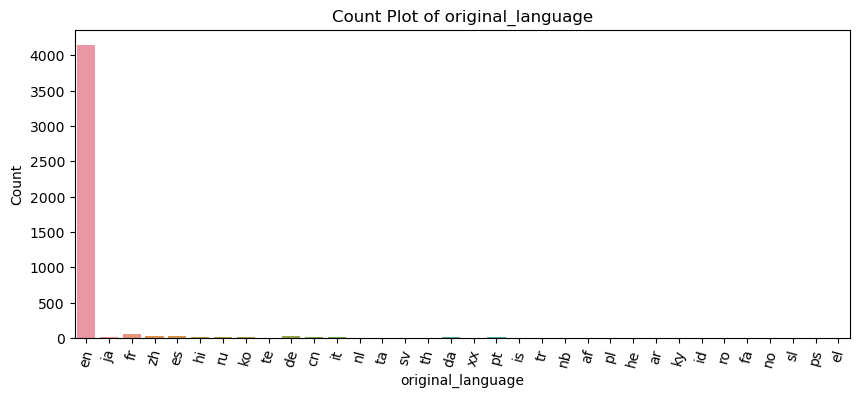

In [37]:
count('original_language')

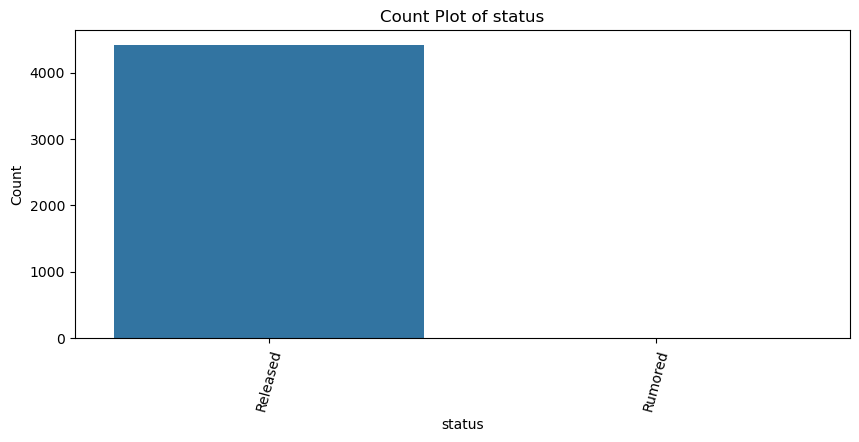

In [38]:
count('status')

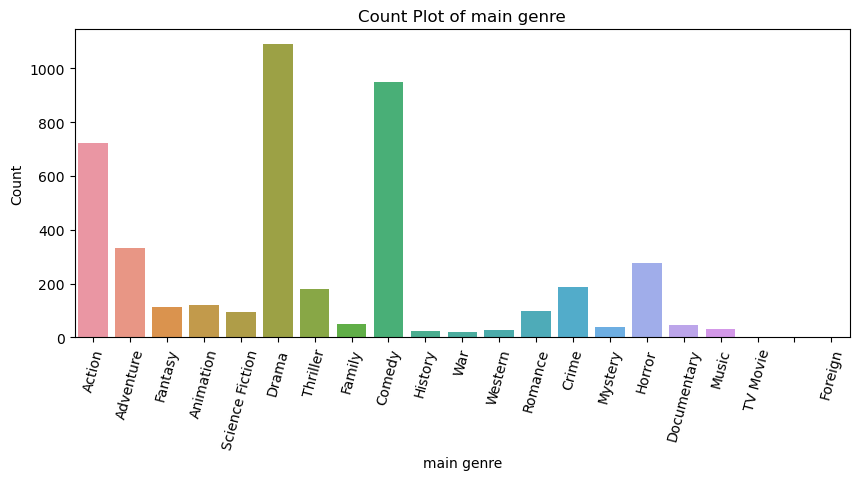

In [39]:
count('main genre')

In [40]:
movie_df['main genre'].value_counts()

Drama              1090
Comedy              949
Action              723
Adventure           334
Horror              278
Crime               188
Thriller            180
Animation           119
Fantasy             115
Romance             100
Science Fiction      94
Family               50
Documentary          48
Mystery              40
Music                33
Western              27
History              23
War                  22
TV Movie              3
                      2
Foreign               1
Name: main genre, dtype: int64

In [41]:
def num_plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram
    axes[0].hist(movie_df[col].dropna(), bins=20, edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Histogram of {col}')

    # Boxplot
    sns.boxplot(data=movie_df, y=col, ax=axes[1])
    axes[1].set_ylabel(col)
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

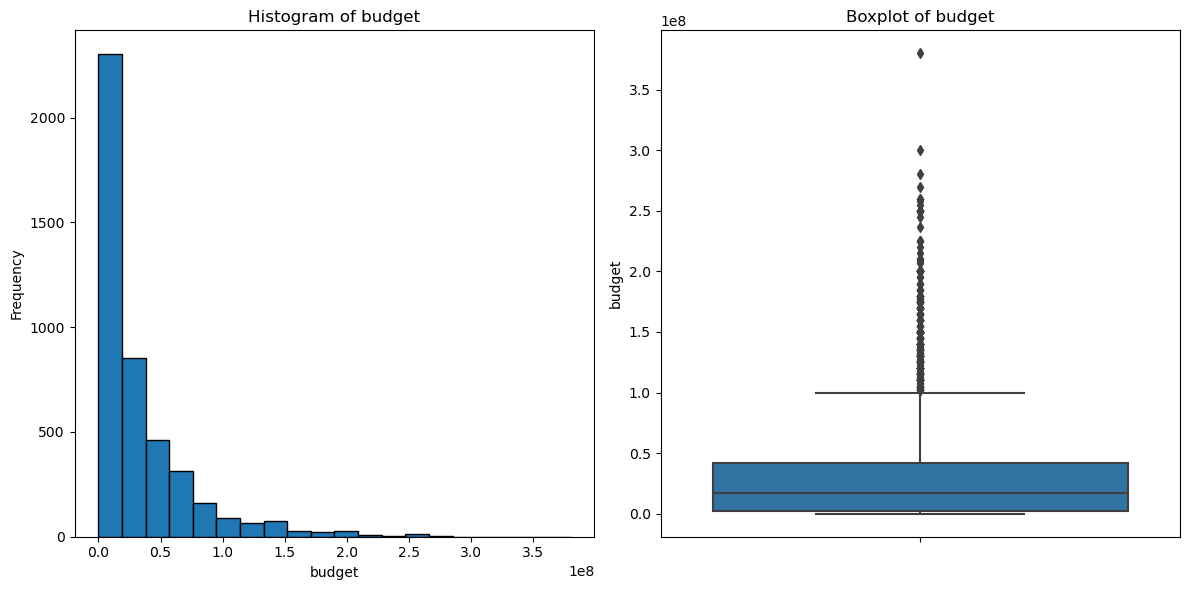

In [42]:
num_plot('budget')

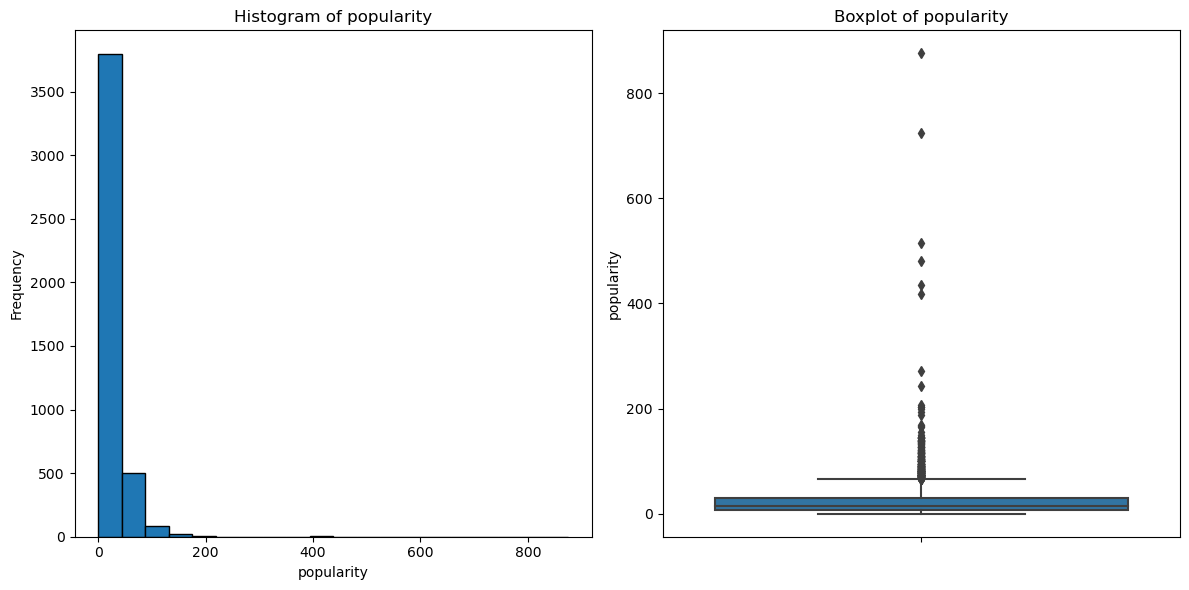

In [43]:
num_plot('popularity')

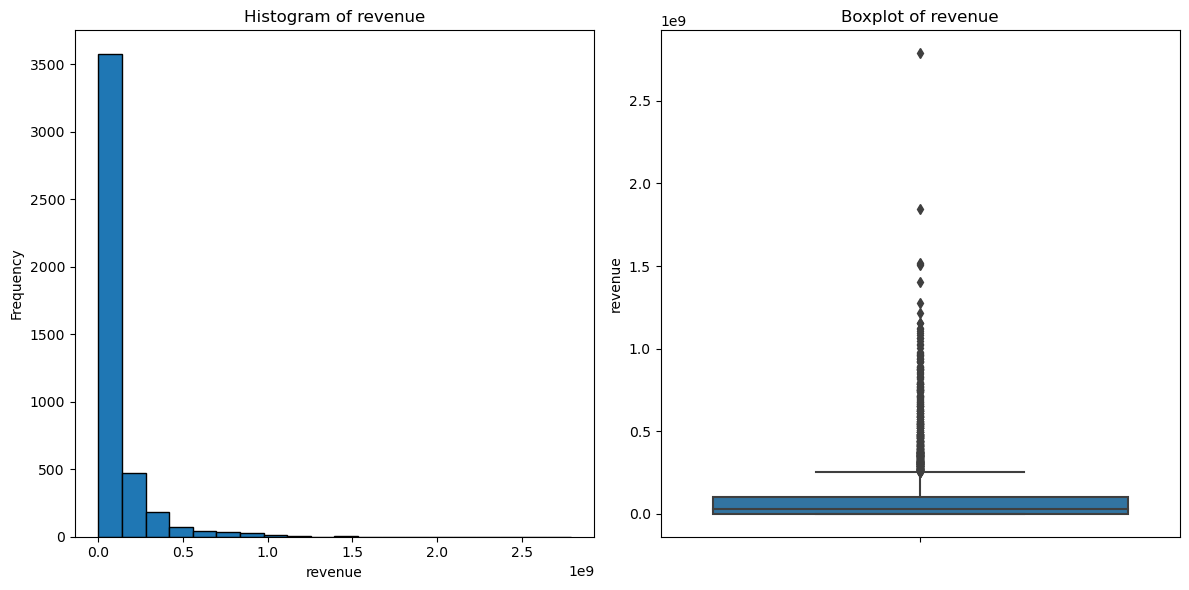

In [44]:
num_plot('revenue')

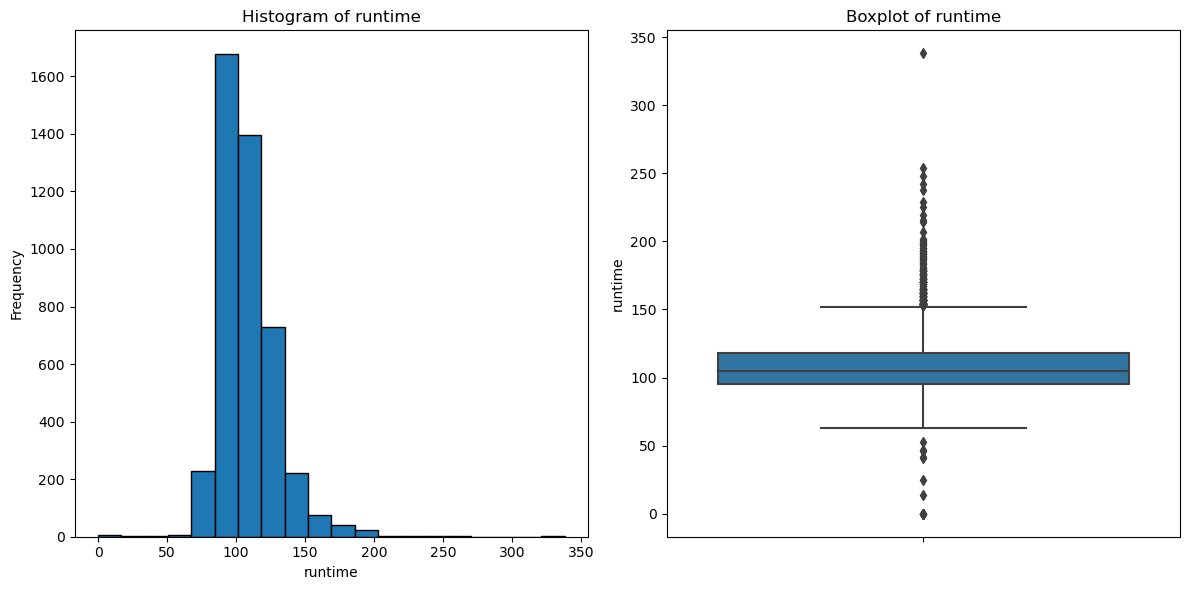

In [45]:
num_plot('runtime')

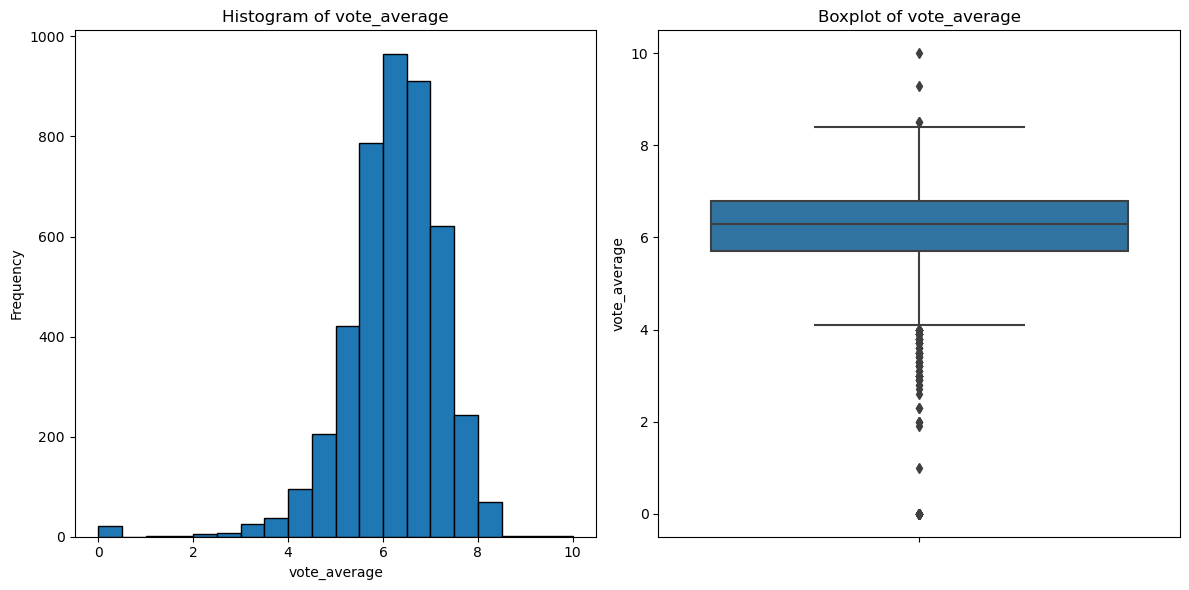

In [46]:
num_plot('vote_average')

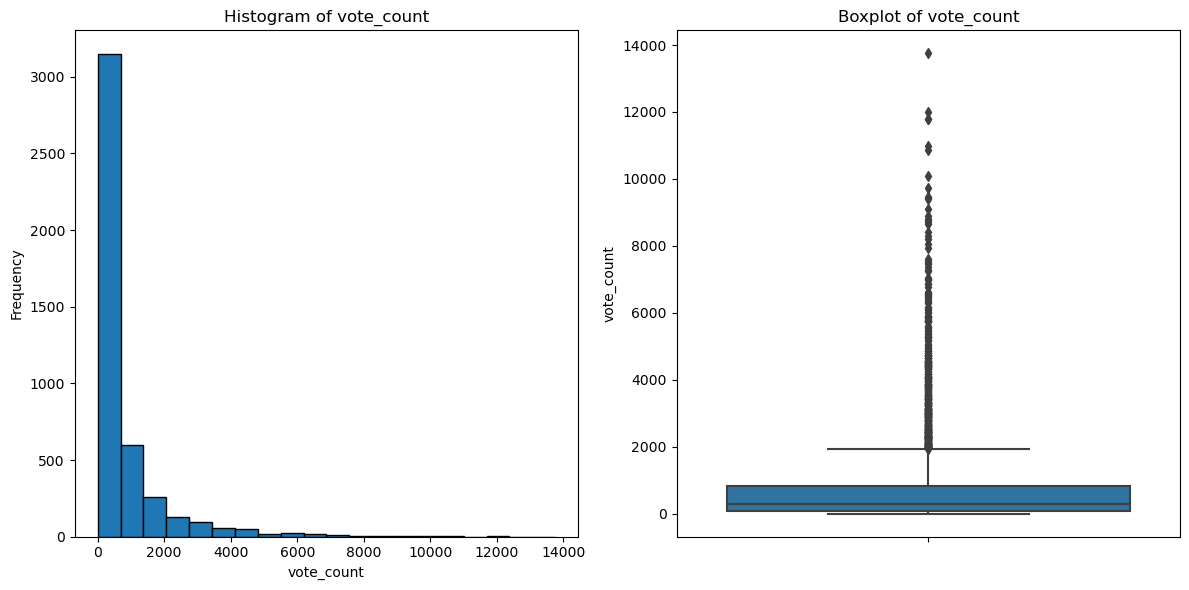

In [47]:
num_plot('vote_count')

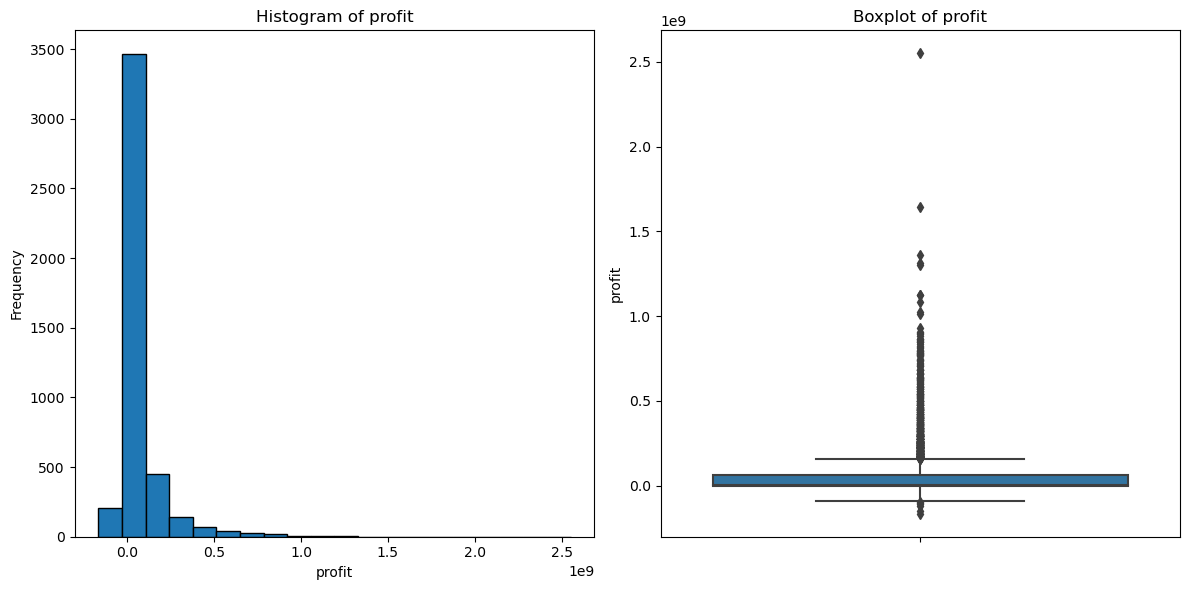

In [48]:
num_plot('profit')

<AxesSubplot:ylabel='Frequency'>

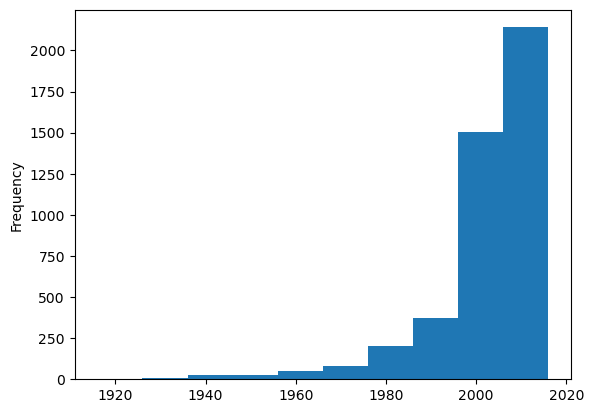

In [49]:
movie_df.release_year.plot(kind='hist',x="release_year",y="Distrbution")

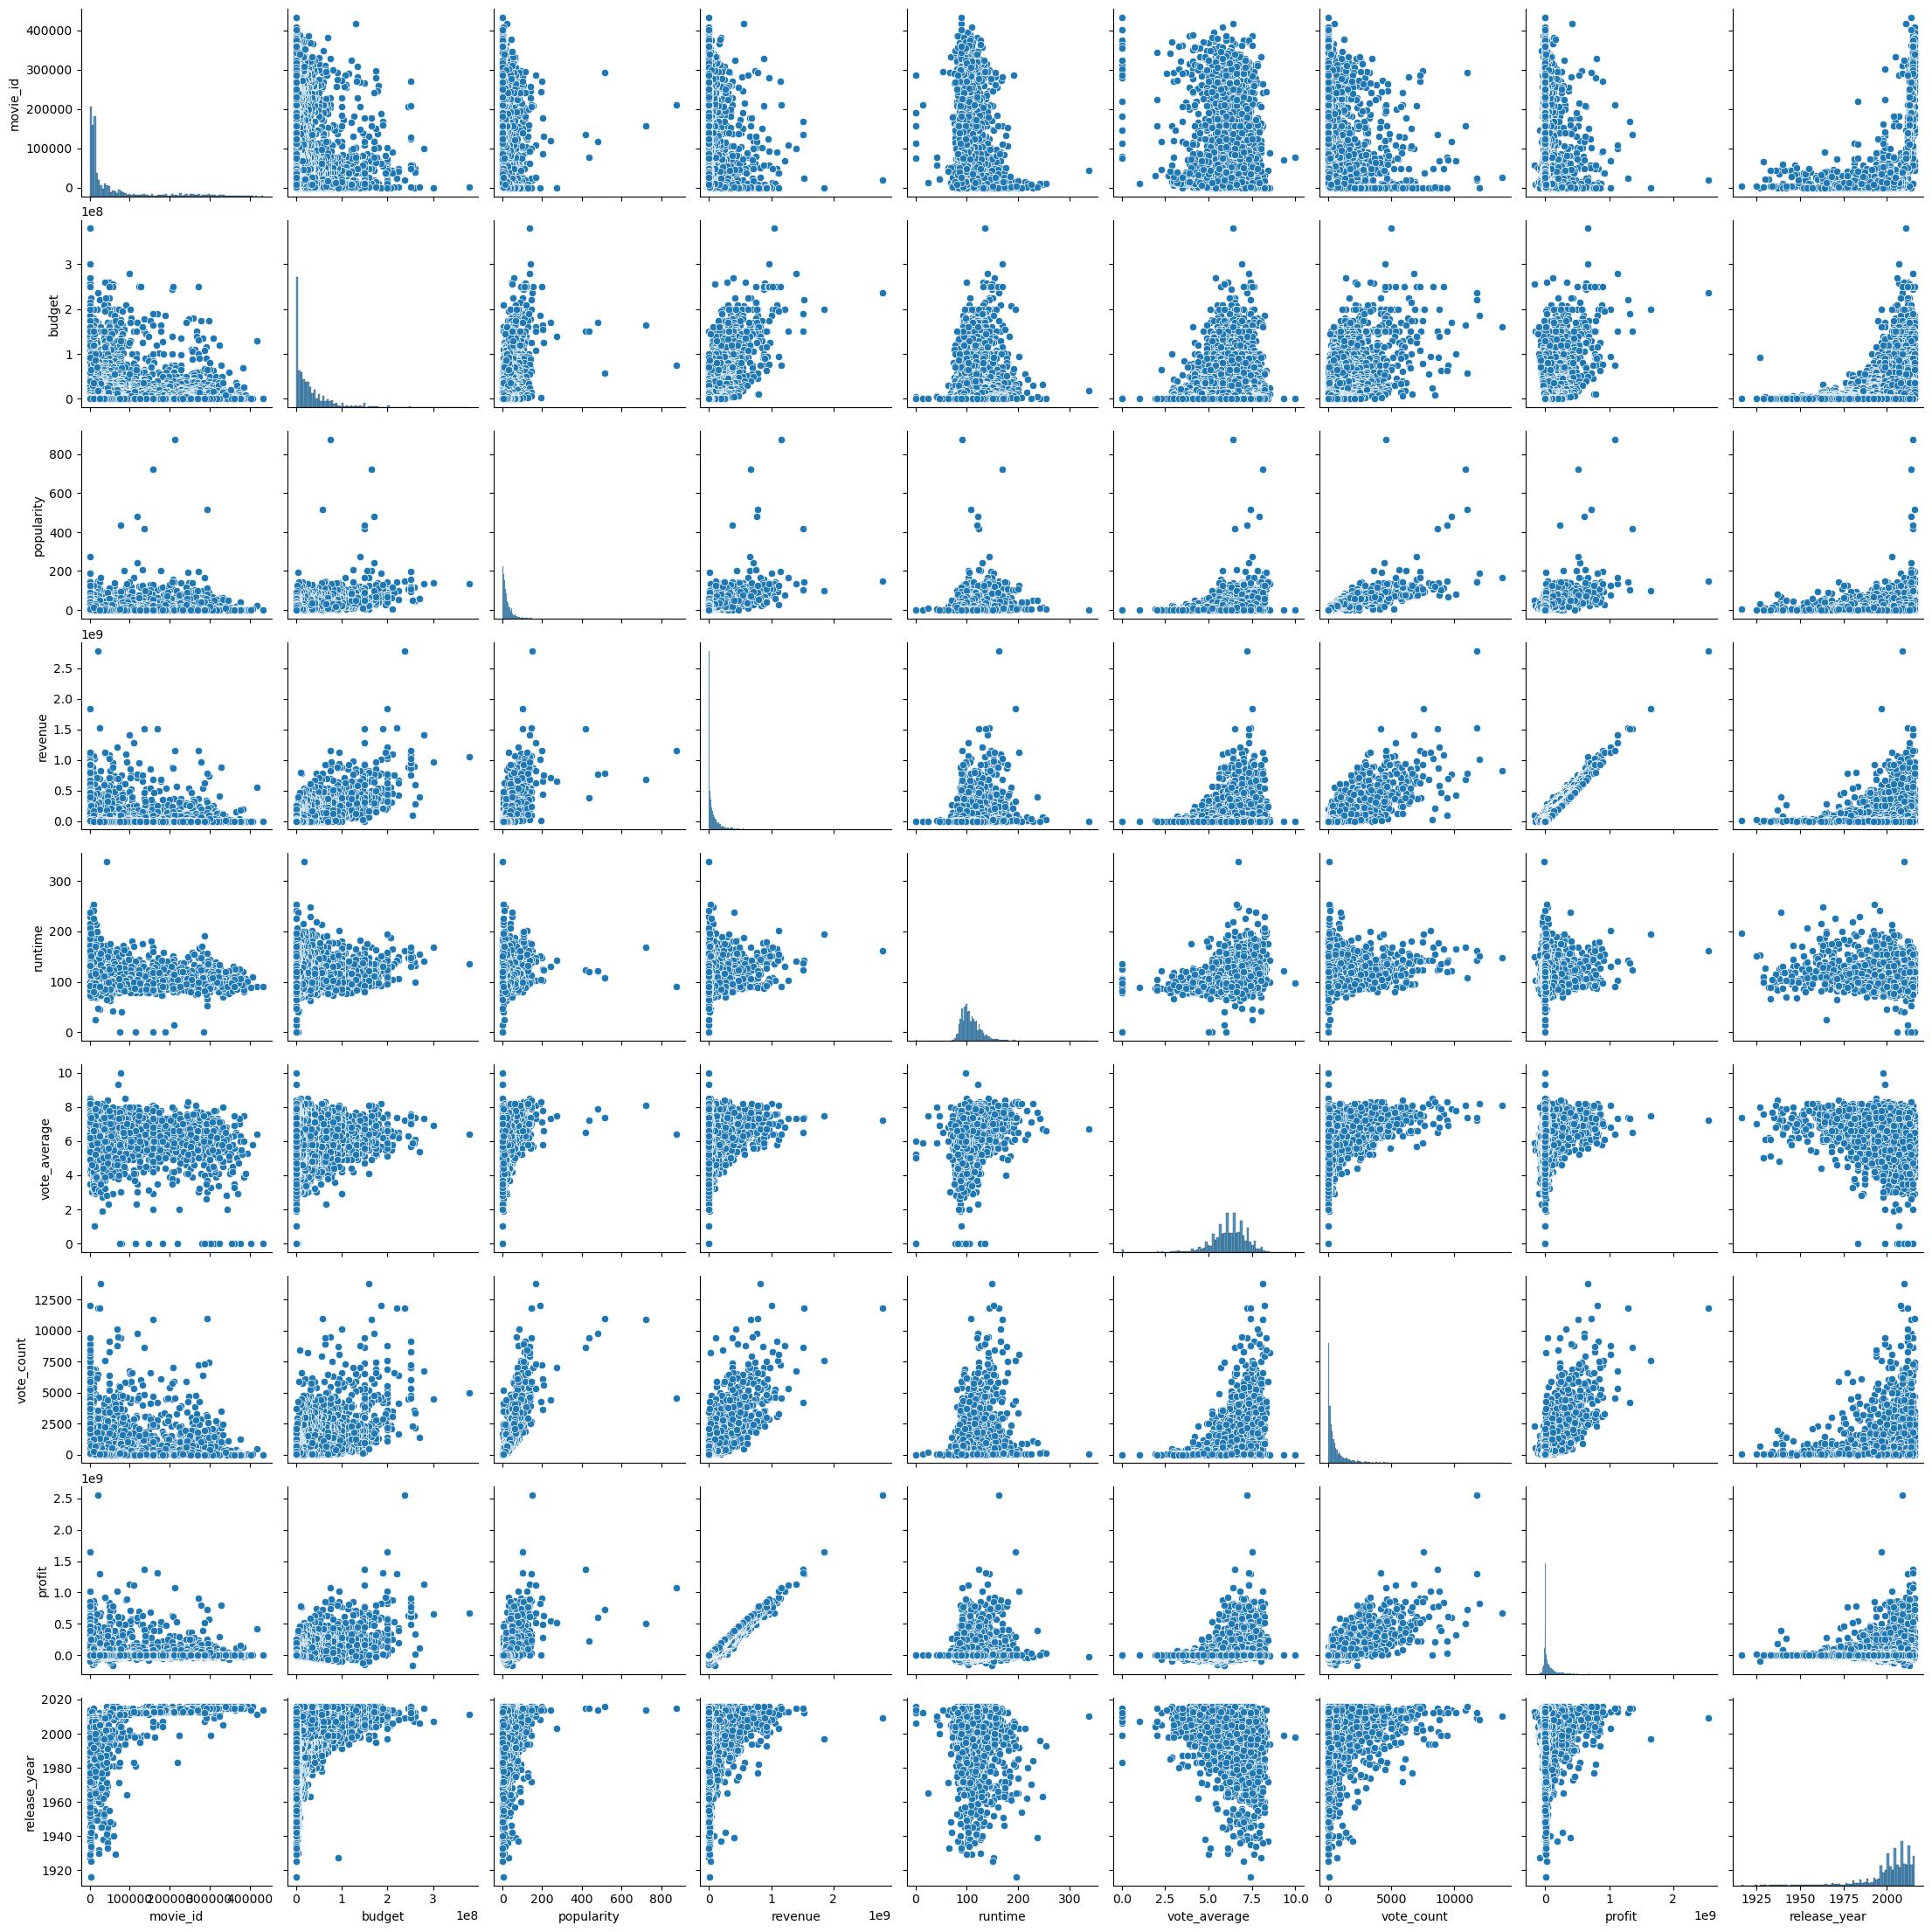

In [50]:
sns.pairplot(movie_df)

In [51]:
movie_df.shape

(4419, 20)

In [52]:
movie_df.describe()

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count,profit,release_year
count,4419.000000,4.419000e+03,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000
mean,52942.126273,3.144989e+07,23.219085,8.933932e+07,108.271390,6.180810,748.689296,5.788942e+07,2002.181942
std,84762.180695,4.155871e+07,32.594522,1.679270e+08,20.920031,1.019384,1270.337787,1.407760e+08,12.704067
min,5.000000,0.000000e+00,0.001586,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,1916.000000
25%,8478.500000,2.600000e+06,6.249772,1.050000e+01,95.000000,5.700000,80.000000,-1.298568e+06,1999.000000
50%,13483.000000,1.700000e+07,14.752587,2.583662e+07,105.000000,6.300000,285.000000,6.361217e+06,2005.000000
75%,50646.500000,4.200000e+07,30.030585,1.016357e+08,118.000000,6.800000,826.000000,6.309199e+07,2010.000000
max,433715.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,2016.000000


In [53]:
#Treating the data with zero values and outliers.

In [54]:
budget_25 = np.percentile(movie_df['budget'], 25)
movie_df.loc[movie_df['budget'] < budget_25, 'budget'] =budget_25

In [55]:
revenue_25 = np.percentile(movie_df['revenue'], 25)
movie_df.loc[movie_df['revenue'] < revenue_25, 'revenue'] =budget_25

In [56]:
movie_df.loc[movie_df['vote_average'] ==0 , 'vote_average'] = movie_df['vote_average'].mean()
movie_df.loc[movie_df['vote_count'] ==0 , 'vote_count'] = movie_df['vote_count'].mean()

In [57]:
movie_df.loc[movie_df['runtime'] ==0 , 'runtime'] = movie_df['runtime'].mean()

In [58]:
movie_df.to_csv('C:/Users/saran/OneDrive/Documents/TMDB_movies_capstone.csv')    ## exporting as csv file

In [59]:
movie_df.describe()  # rechecking

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count,profit,release_year
count,4419.000000,4.419000e+03,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000
mean,52942.126273,3.201290e+07,23.219085,8.998946e+07,108.393896,6.210183,752.247222,5.788942e+07,2002.181942
std,84762.180695,4.114530e+07,32.594522,1.675844e+08,20.600139,0.925577,1269.283675,1.407760e+08,12.704067
min,5.000000,2.600000e+06,0.001586,1.100000e+01,14.000000,1.000000,1.000000,-1.657101e+08,1916.000000
25%,8478.500000,2.600000e+06,6.249772,2.600000e+06,95.000000,5.700000,82.000000,-1.298568e+06,1999.000000
50%,13483.000000,1.700000e+07,14.752587,2.583662e+07,105.000000,6.300000,290.000000,6.361217e+06,2005.000000
75%,50646.500000,4.200000e+07,30.030585,1.016357e+08,118.000000,6.800000,826.000000,6.309199e+07,2010.000000
max,433715.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,2016.000000


### ML models

##### Adding a new column rating based on mean vote_avg

In [77]:
M=movie_df['vote_average'].mean()

In [78]:
rating=[]
for i in movie_df.vote_average:
    if i > M:
        rating.append('Good')
    elif i >= M/2 and i <=M:
        rating.append('Average')
    elif i < M/2:
        rating.append('Poor')
movie_df['Rating']=rating

In [79]:
movie_df['Rating'].value_counts()

Good       2230
Average    2162
Poor         27
Name: Rating, dtype: int64

In [80]:
movie_df2=movie_df.copy()
movie_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4419 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4419 non-null   int64  
 1   title                 4419 non-null   object 
 2   budget                4419 non-null   int64  
 3   original_language     4419 non-null   object 
 4   popularity            4419 non-null   float64
 5   production_companies  4419 non-null   object 
 6   production_countries  4419 non-null   object 
 7   release_date          4419 non-null   object 
 8   revenue               4419 non-null   int64  
 9   runtime               4419 non-null   float64
 10  status                4419 non-null   object 
 11  vote_average          4419 non-null   float64
 12  vote_count            4419 non-null   float64
 13  director              4419 non-null   object 
 14  cast 1                4419 non-null   object 
 15  cast 2               

In [81]:
obj = list(movie_df2.select_dtypes(include=['object']).columns)  # creating a list of all columns with datatype as object
obj

['title',
 'original_language',
 'production_companies',
 'production_countries',
 'release_date',
 'status',
 'director',
 'cast 1',
 'cast 2',
 'main genre',
 'sub genre',
 'Rating']

In [82]:
for i in obj:                   # using label encoder to non numerical columns to numerical columns
    movie_df2[i]=LabelEncoder().fit_transform(movie_df2[i])
movie_df2.head(10)

,movie_id,title,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre,profit,release_year,Rating
0,19995,350,237000000,6,150.437577,599,64,1009,2787965087,162.0,...,7.2,11800.0,790,1562,2477,1,1,2550965087,2009,1
1,285,2426,300000000,6,139.082615,1239,64,1948,961000000,169.0,...,6.9,4500.0,686,890,1827,2,8,661000000,2007,1
2,206647,2918,245000000,6,107.376788,258,63,2730,880674609,148.0,...,6.3,4466.0,1752,396,408,1,1,635674609,2015,1
3,49026,3325,250000000,6,112.312950,679,64,1634,1084939099,165.0,...,7.6,9106.0,322,326,1660,1,4,834939099,2012,1
4,49529,1746,260000000,6,43.926995,1239,64,614,284139100,132.0,...,6.1,2124.0,84,1709,1494,1,1,24139100,2012,0
5,559,2930,258000000,6,115.699814,258,64,63,890871626,139.0,...,5.9,3576.0,1755,1747,1367,9,0,632871626,2007,0
6,38757,3088,260000000,6,48.681969,1239,64,2516,591794936,100.0,...,7.4,3330.0,248,1859,1519,3,7,331794936,2010,1
7,99861,351,280000000,6,134.279229,742,64,2264,1405403694,141.0,...,7.3,6767.0,1049,1492,387,1,1,1125403694,2015,1
8,767,1455,250000000,6,98.885637,1244,63,648,933959197,153.0,...,7.4,5293.0,468,399,2057,2,8,683959197,2009,1
9,209112,409,250000000,6,155.790452,291,64,2362,873260194,151.0,...,5.7,7004.0,2078,163,880,1,1,623260194,2016,0


In [83]:
s_df=pd.DataFrame(normalize(StandardScaler().fit_transform(movie_df2)),columns=movie_df2.columns)    # sacling the data using scaler
s_df

,movie_id,title,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre,profit,release_year,Rating
0,-0.014604,-0.054731,0.187181,-0.005820,0.146643,-0.014626,0.020264,-0.022467,0.604866,0.097768,...,0.040179,0.327017,-0.017552,0.043691,0.065789,-0.041959,-0.049274,0.665367,0.020164,0.035464
1,-0.055797,0.015361,0.584988,-0.013913,0.319268,0.115525,0.048441,0.040124,0.466813,0.264241,...,0.066938,0.265195,-0.057299,-0.008258,0.075274,-0.081248,-0.020837,0.384788,0.034063,0.084778
2,0.180841,0.055527,0.516231,-0.015448,0.257490,-0.127853,0.048533,0.131317,0.470523,0.191736,...,0.009677,0.291787,0.110970,-0.101162,-0.115182,-0.111374,-0.130791,0.409307,0.100621,0.094132
3,-0.003628,0.068784,0.416041,-0.012164,0.214649,-0.014123,0.042353,0.007648,0.466222,0.215784,...,0.117915,0.516831,-0.097042,-0.089923,0.047394,-0.087699,-0.066659,0.433457,0.060689,0.074123
4,-0.005836,-0.052485,0.803018,-0.022449,0.092072,0.186405,0.078162,-0.150349,0.167895,0.166069,...,-0.017252,0.156622,-0.235735,0.208309,0.053675,-0.161848,-0.190065,-0.034744,0.112000,-0.146339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,0.208811,-0.352615,-0.176552,-0.038258,-0.168980,-0.421380,0.133204,-0.188353,-0.128790,-0.124613,...,-0.056084,-0.146177,-0.383892,-0.244076,0.228496,0.038600,0.361659,-0.101561,-0.139622,-0.249391
4415,-0.115207,0.053574,-0.180823,-0.039183,0.000690,0.266417,0.136426,-0.218801,-0.135189,-0.385489,...,0.188520,-0.018782,0.298917,0.317299,-0.242058,0.522574,-0.136702,-0.103267,0.036199,0.238761
4416,-0.136175,-0.239863,-0.189356,0.052001,-0.072729,-0.339596,-0.164135,-0.347009,-0.139013,-0.352245,...,0.111560,-0.107319,0.267780,-0.334982,-0.096475,-0.295824,-0.224851,-0.105500,-0.212300,0.250028
4417,0.597560,0.136056,-0.202646,-0.043912,-0.189376,-0.211289,0.152891,-0.064803,-0.147824,0.159712,...,0.241899,-0.166665,0.325216,-0.211864,0.059602,-0.136141,-0.153200,-0.116571,0.241394,0.267576


In [84]:
cor_matrix=s_df.corr()    # calculating the correlation matrix
cor_matrix

,movie_id,title,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre,profit,release_year,Rating
movie_id,1.000000,-0.003341,-0.053387,0.074993,0.104961,-0.030798,-0.027547,0.003183,-0.010265,-0.052327,...,-0.096067,0.088518,-0.022116,-0.014726,0.004581,0.118958,0.045232,0.007208,0.424246,-0.065545
title,-0.003341,1.000000,0.020836,0.003836,-0.005270,0.004741,-0.020178,0.017499,0.009324,0.027787,...,0.022382,0.001868,0.002861,-0.016113,0.018893,0.027539,-0.015814,0.003436,0.002501,0.033230
budget,-0.053387,0.020836,1.000000,-0.029343,0.494006,0.081663,-0.009248,0.016871,0.667695,0.240677,...,-0.051602,0.481912,0.016567,-0.002480,-0.012830,-0.136495,-0.176731,0.434428,0.136089,-0.077210
original_language,0.074993,0.003836,-0.029343,1.000000,-0.009150,-0.039161,-0.153059,0.006539,-0.008681,0.075292,...,0.067483,0.002322,-0.005073,0.011473,0.026271,0.016024,-0.001316,0.000464,0.019236,0.057681
popularity,0.104961,-0.005270,0.494006,-0.009150,1.000000,0.059880,0.006313,0.030952,0.661231,0.211477,...,0.292774,0.850392,0.004538,-0.005926,-0.001377,0.008095,-0.077178,0.615986,0.121441,0.196506
production_companies,-0.030798,0.004741,0.081663,-0.039161,0.059880,1.000000,0.021505,0.015246,0.083559,0.014521,...,-0.023548,0.047813,0.001929,0.031782,0.004794,-0.044433,-0.052670,0.070840,-0.087249,-0.029400
production_countries,-0.027547,-0.020178,-0.009248,-0.153059,0.006313,0.021505,1.000000,0.007363,0.027249,-0.038711,...,-0.024306,0.009788,-0.005923,0.000321,0.004325,-0.003208,0.018828,0.036960,-0.080508,-0.009560
release_date,0.003183,0.017499,0.016871,0.006539,0.030952,0.015246,0.007363,1.000000,0.027095,0.030977,...,0.014786,0.021368,-0.012348,0.034473,0.015369,0.009588,0.001029,0.026472,-0.020677,0.012998
revenue,-0.010265,0.009324,0.667695,-0.008681,0.661231,0.083559,0.027249,0.027095,1.000000,0.213249,...,0.132765,0.708756,0.013952,0.018926,-0.003847,-0.065859,-0.121632,0.960526,0.049626,0.080614
runtime,-0.052327,0.027787,0.240677,0.075292,0.211477,0.014521,-0.038711,0.030977,0.213249,1.000000,...,0.350100,0.216778,0.043878,0.010967,0.000343,0.033730,0.024346,0.168010,-0.150827,0.266897


<AxesSubplot:>

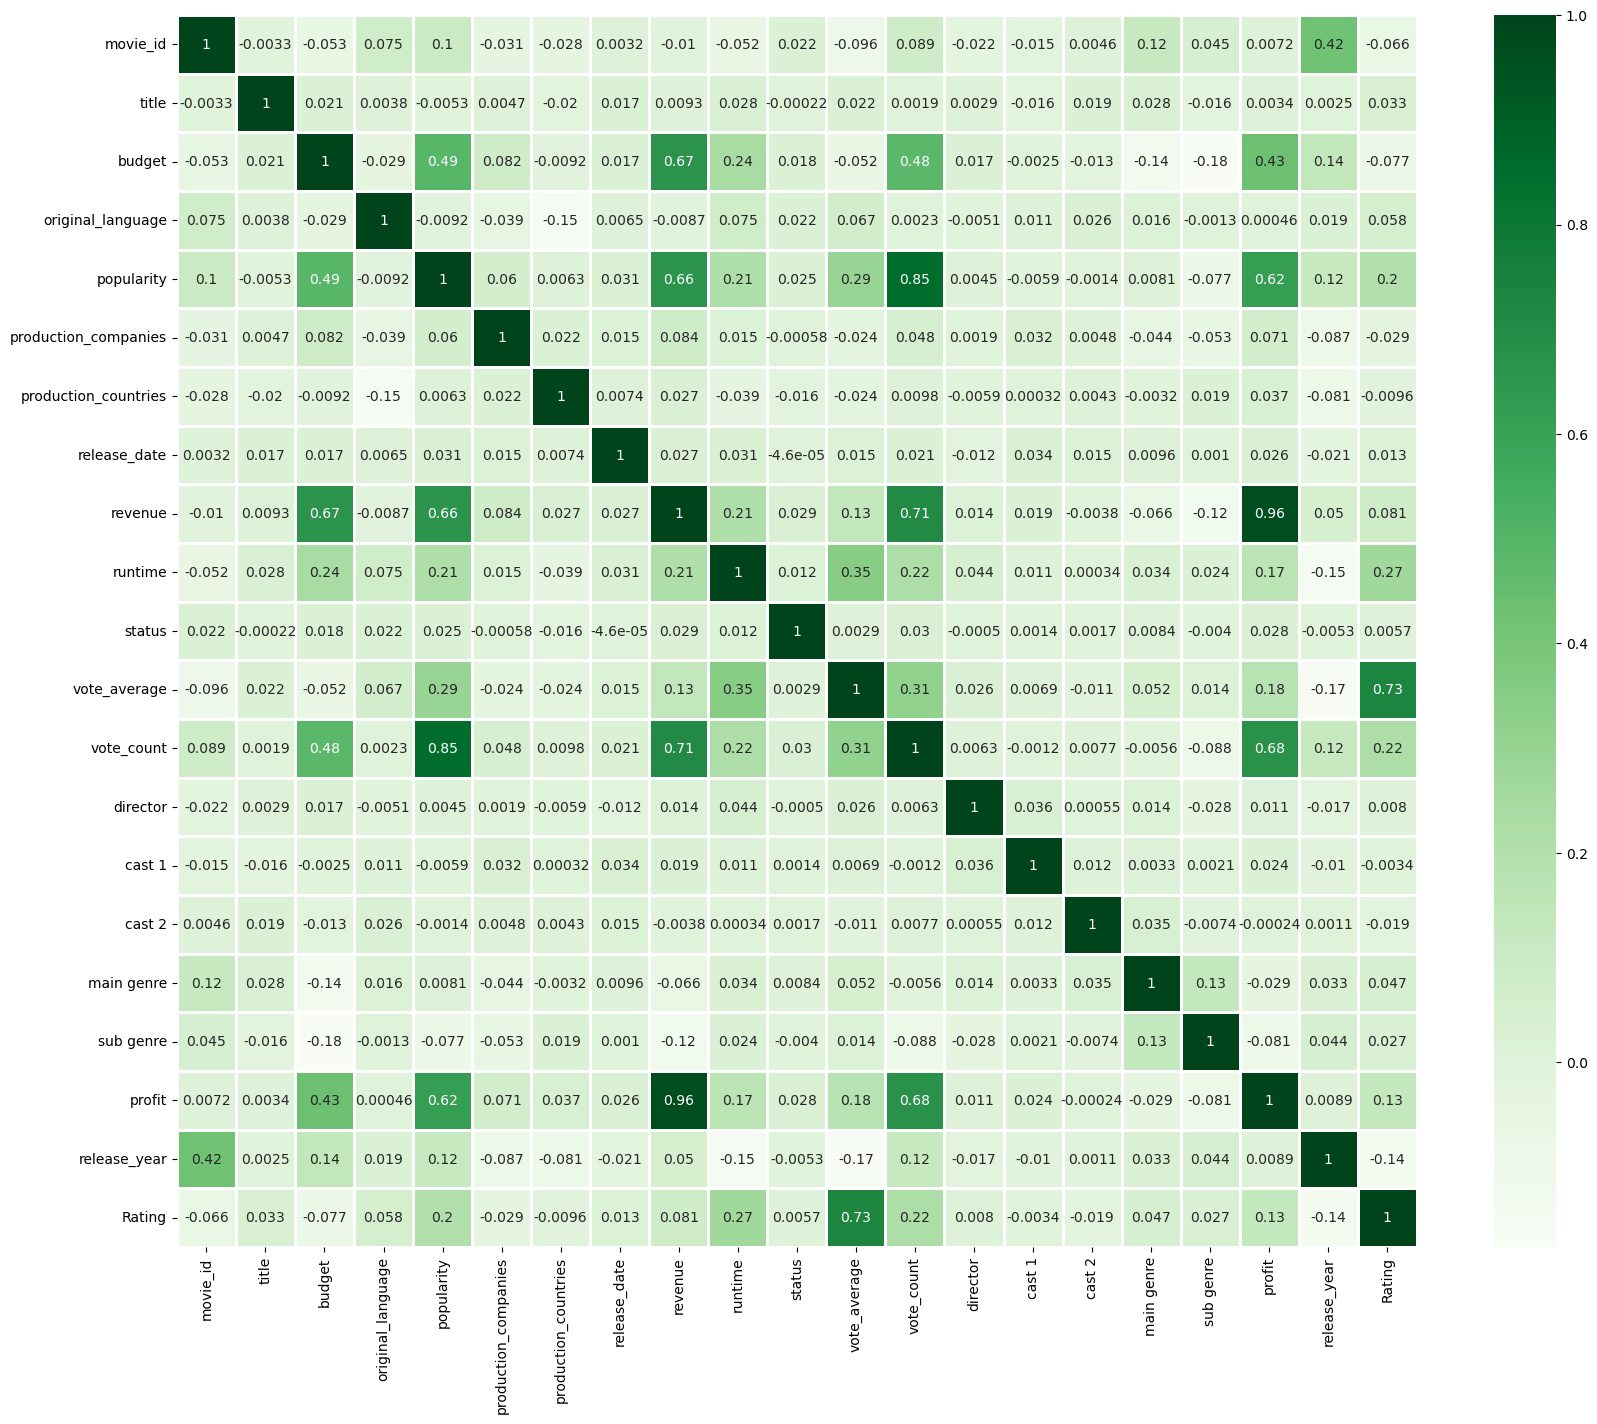

In [85]:
plt.figure(figsize=(20,16))
sns.heatmap(cor_matrix,annot=True, linewidths=1,cmap='Greens',linecolor='white')

In [86]:
def correlation(df,threshold):
    col_corr=set()
    correlation_matrix=df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if(abs(correlation_matrix.iloc[i,j]))>threshold:
                col_name=correlation_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [87]:
selected_features=correlation(s_df,0.7)
len(set(selected_features))

3

In [88]:
selected_features

{'Rating', 'profit', 'vote_count'}

In [89]:
s_df.drop(columns=['revenue','vote_count','movie_id','title','release_date','status','vote_average'],inplace=True)

In [90]:
X1=s_df.drop('Rating',axis=1)       #seperating the features and target variables
y1=movie_df2["Rating"] 

In [91]:
os=SMOTE()                  #mitigating the class imbalance using SMOTE
X,y=os.fit_resample(X1,y1)

In [92]:
X

,budget,original_language,popularity,production_companies,production_countries,runtime,director,cast 1,cast 2,main genre,sub genre,profit,release_year
0,0.187181,-0.005820,0.146643,-0.014626,0.020264,0.097768,-0.017552,0.043691,0.065789,-0.041959,-0.049274,0.665367,0.020164
1,0.584988,-0.013913,0.319268,0.115525,0.048441,0.264241,-0.057299,-0.008258,0.075274,-0.081248,-0.020837,0.384788,0.034063
2,0.516231,-0.015448,0.257490,-0.127853,0.048533,0.191736,0.110970,-0.101162,-0.115182,-0.111374,-0.130791,0.409307,0.100621
3,0.416041,-0.012164,0.214649,-0.014123,0.042353,0.215784,-0.097042,-0.089923,0.047394,-0.087699,-0.066659,0.433457,0.060689
4,0.803018,-0.022449,0.092072,0.186405,0.078162,0.166069,-0.235735,0.208309,0.053675,-0.161848,-0.190065,-0.034744,0.112000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685,-0.105460,-0.022853,-0.097045,-0.106640,0.078646,0.010185,0.188143,-0.198127,0.053118,-0.054370,-0.213537,-0.060975,0.154964
6686,-0.099767,-0.025566,-0.115313,-0.250424,0.086272,-0.102255,-0.205999,0.155542,-0.054310,-0.101346,0.241679,-0.074153,-0.103487
6687,-0.108366,-0.023482,-0.084269,-0.183280,-0.200060,-0.131261,-0.222670,-0.013380,0.198829,-0.088219,-0.069752,-0.054095,0.012161
6688,-0.109464,-0.023720,-0.107547,0.042106,-0.250391,-0.167655,0.007001,0.067083,-0.023741,0.246148,0.224231,-0.062968,-0.063867


In [93]:
y.value_counts()

1    2230
0    2230
2    2230
Name: Rating, dtype: int64

In [94]:
#X=StandardScaler().fit_transform(X)

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)   # Splitting the data into training and testing data

### Logistic Regression

In [96]:
model=LogisticRegression(multi_class='multinomial').fit(X_train,y_train)    # fitting the model on training set
y_pred=model.predict(X_test)

In [97]:
print('Train score: ',model.score(X_train,y_train))   # printing model score for train and test set
print('Test score: ',model.score(X_test,y_test))


Train score:  0.6327140721759555
Test score:  0.6188340807174888


In [98]:
cm1=confusion_matrix(y_test,y_pred)   # printing confusion matrix
cm1

array([[272, 161, 249],
       [124, 432, 112],
       [119,   0, 538]], dtype=int64)

In [99]:
print(classification_report(y_test,y_pred))   # printing the classification report

              precision    recall  f1-score   support

           0       0.53      0.40      0.45       682
           1       0.73      0.65      0.69       668
           2       0.60      0.82      0.69       657

    accuracy                           0.62      2007
   macro avg       0.62      0.62      0.61      2007
weighted avg       0.62      0.62      0.61      2007



### gaussianNB

In [102]:
gnb_model=GaussianNB().fit(X_train,y_train)            # fitting the model on training set
y_predg=gnb_model.predict(X_test)


In [103]:
print(gnb_model.score(X_train,y_train))              # printing model score for train and test set
print(accuracy_score(y_test,y_pred))

0.7535767670296818
0.6188340807174888


In [244]:
GNcm=confusion_matrix(y_test,y_predg)                     # printing confusion matrix
GNcm

array([[548, 128,  40],
       [368, 369,   4],
       [ 21,  18, 682]], dtype=int64)

In [245]:
print(classification_report(y_test,y_predg))

              precision    recall  f1-score   support

           0       0.58      0.77      0.66       716
           1       0.72      0.50      0.59       741
           2       0.94      0.95      0.94       721

    accuracy                           0.73      2178
   macro avg       0.75      0.74      0.73      2178
weighted avg       0.75      0.73      0.73      2178



### Decision Tree

In [246]:
kf=KFold(n_splits=5)   

In [247]:
param_grid={'min_samples_split':[10,20,30],              #hyperparameters
           'min_samples_leaf':[20,40,100],
           'max_depth':[3,4,5,6,7,8,9,10]}

In [248]:
dt=DecisionTreeClassifier()

In [249]:
grid_cv=GridSearchCV(dt,param_grid,cv=kf)      #hyperparameter tuning using gridsearch cv

In [250]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30]})

In [251]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=10)

In [252]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 10}

In [253]:
grid_cv.best_score_

0.7926031093458451

In [254]:
dmodel=DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=10).fit(X_train,y_train)
y_pred_dt=dmodel.predict(X_test)                        #fitting the model on training set with best parameters
print(dmodel.score(X_train,y_train))
print(dmodel.score(X_test,y_test))

0.8404171585989768
0.7947658402203857


In [255]:
dcm=confusion_matrix(y_test,y_pred_dt)         # printing confusion matrix
dcm

array([[555, 158,   3],
       [271, 465,   5],
       [  2,   8, 711]], dtype=int64)

In [256]:
print(classification_report(y_test,y_pred_dt)) 

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       716
           1       0.74      0.63      0.68       741
           2       0.99      0.99      0.99       721

    accuracy                           0.79      2178
   macro avg       0.80      0.80      0.79      2178
weighted avg       0.80      0.79      0.79      2178



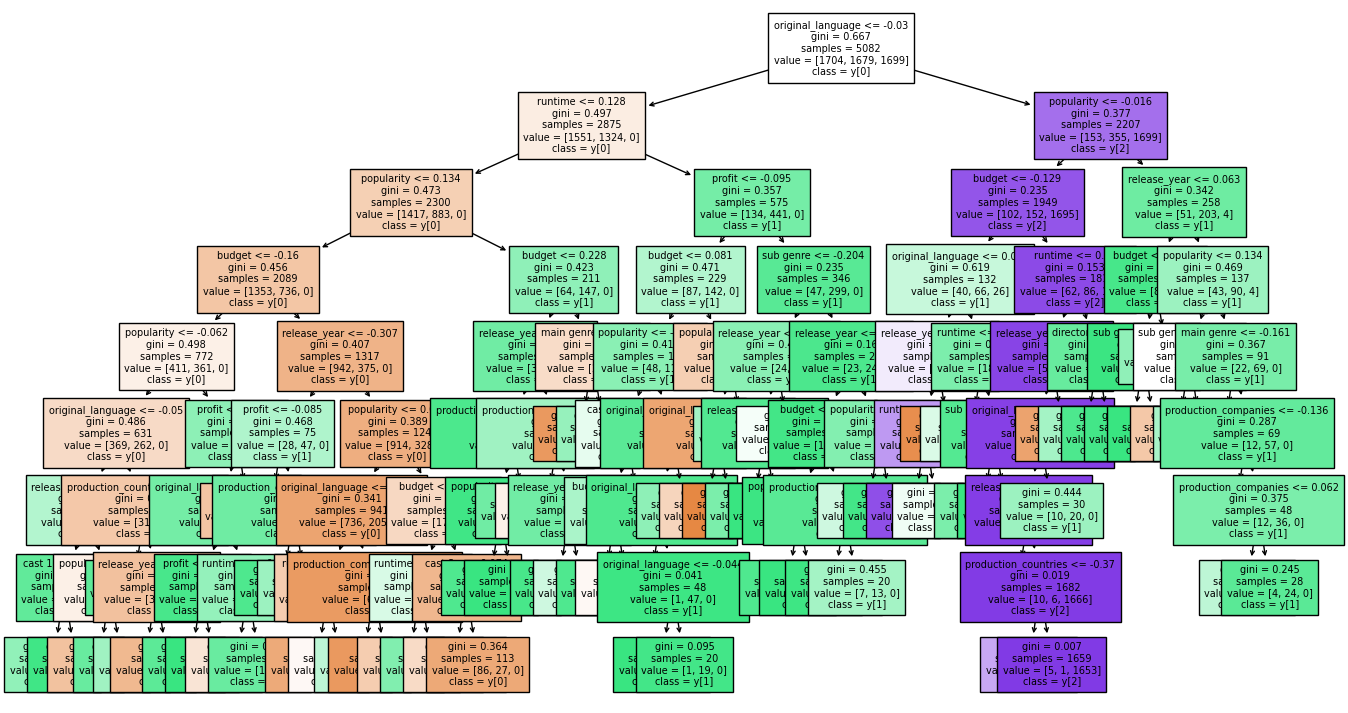

In [257]:
from sklearn import tree
plt.figure(figsize=(16, 9))
tree.plot_tree(grid_cv.best_estimator_, feature_names=X1.columns, class_names=True, filled=True,fontsize=7)
plt.show()

### Random Forest

In [258]:
param_grid2 = {'n_estimators': [50, 100, 200, 500],  
    'max_depth': [4, 5, 6, 8, 9, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [10, 20, 40],}                #parameters for hyperparameter tuning

In [259]:
rf=RandomForestClassifier(random_state=42)

In [260]:
grid_cv2=GridSearchCV(rf,param_grid2,cv=kf)                      

In [261]:
grid_cv2.fit(X_train,y_train)                            #hyperparameter tuning using gridsearch cv

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 8, 9, 10],
                         'min_samples_leaf': [10, 20, 40],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [50, 100, 200, 500]})

In [262]:
grid_cv2.best_score_

0.8297904133664706

In [263]:
grid_cv2.best_params_

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 500}

In [265]:
rfmodel=RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=30,n_estimators=500)
rfmodel.fit(X,y)
y_pred_rf=rfmodel.predict(X_test)
print("R_square Training data:",rfmodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",rfmodel.score(X_test,y_test))

R_square Training data: 0.8943329397874853
R_square Test data: 0.8948576675849403


In [266]:
rfcm=confusion_matrix(y_test,y_pred_rf)
rfcm

array([[610, 104,   2],
       [121, 618,   2],
       [  0,   0, 721]], dtype=int64)

In [267]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       716
           1       0.86      0.83      0.84       741
           2       0.99      1.00      1.00       721

    accuracy                           0.89      2178
   macro avg       0.89      0.90      0.90      2178
weighted avg       0.89      0.89      0.89      2178



### KNeighbors Classifier

In [268]:
from sklearn.neighbors import KNeighborsClassifier

In [269]:
accuracy=[]                                               # finding optimal value of n_neighbors
for i in range(2,16 ):        
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    accuracy.append(np.mean(score))
    print(i, ":", np.mean(score))

2 : 0.7418732782369146
3 : 0.753168044077135
4 : 0.7422865013774105
5 : 0.7502754820936638
6 : 0.7349862258953168
7 : 0.7393939393939395
8 : 0.7245179063360883
9 : 0.7289256198347107
10 : 0.7188705234159779
11 : 0.7210743801652892
12 : 0.7139118457300275
13 : 0.7130853994490358
14 : 0.7045454545454547
15 : 0.7057851239669422


In [270]:
k=5
kmodel=KNeighborsClassifier(k).fit(X_train,y_train)             #fitting the model on training set
y_pred_kn=kmodel.predict(X_test)

In [271]:
print(kmodel.score(X_train,y_train))               #printing model scores
print(kmodel.score(X_test,y_test)) 

0.8467138921684376
0.7603305785123967


In [272]:
confusion_matrix(y_test,y_pred_kn)   

array([[510, 169,  37],
       [293, 425,  23],
       [  0,   0, 721]], dtype=int64)

In [273]:
print(classification_report(y_test,y_pred_kn)) 

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       716
           1       0.72      0.57      0.64       741
           2       0.92      1.00      0.96       721

    accuracy                           0.76      2178
   macro avg       0.76      0.76      0.76      2178
weighted avg       0.76      0.76      0.76      2178



### Stacking

In [274]:
level1 = []
level1.append(('lr', LogisticRegression(multi_class='multinomial')))
level1.append(('GNB', GaussianNB()))
level1.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
level1.append(('SVM', SVC()))
level1.append(('DT', DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=10, random_state=42)))
level1.append(('RF', RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=30, n_estimators=500, random_state=42)))
level2 = LogisticRegression()


kf = KFold(n_splits=5)       # Creating the cross-validation generator

stack_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=kf)  # Creating the StackingClassifier

In [275]:
smodel=stack_model.fit(X_train,y_train)
y_preds=smodel.predict(X_test)

In [276]:
print(smodel.score(X_train,y_train))
print(smodel.score(X_test,y_test)) 

0.9025974025974026
0.8360881542699724


In [277]:
scm=confusion_matrix(y_test,y_preds)
scm

array([[543, 173,   0],
       [184, 557,   0],
       [  0,   0, 721]], dtype=int64)

In [278]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       716
           1       0.76      0.75      0.76       741
           2       1.00      1.00      1.00       721

    accuracy                           0.84      2178
   macro avg       0.84      0.84      0.84      2178
weighted avg       0.84      0.84      0.84      2178



##### On Comparison of model performance using evaluation metrics, Random forest has the best performace and hence chosen as the final model.